In [747]:
import pandas as pd
import numpy as np
np.random.seed(42)

df = pd.read_csv('../NSE_data_all_stocks_2022_jan_to_may (1).csv')
df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,31-May-22,MSC,Mumias Sugar Company Ltd,0.27,0.27,0.27,0.27,0.27,0.27,-,-,-,-
6728,31-May-22,UNGA,Unga Group Ltd,26.1,36.4,29,29,29,30,-1,3.33%,"2,100",-
6729,31-May-22,SCOM,Safaricom Plc,25.5,45.25,25.95,26.45,26,26.25,-0.25,0.95%,"20,079,900",-
6730,31-May-22,FAHR,Stanlib Fahari Income-REIT,5,7.48,5.5,5.6,5.56,5.58,-0.02,0.36%,"11,700",-


In [748]:
#Custom Data cleaner 
import random
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler   
nsc_scaler = StandardScaler()   

class NSEDataPreProcessor(BaseEstimator, TransformerMixin):
    
    def __init__(self,company_code ,columns_to_type_cast, columns_to_scale, columns_to_return):
        self.company_code = company_code        
        self.to_type_cast= columns_to_type_cast 
        self.to_return= columns_to_return
        self.to_scale=columns_to_scale  #same as  columns_to_type_cast but has the company code.       
        
    def __type_cast_and_scale_xyz_df(self, xyz_data_frame):
        for column_name in self.to_type_cast:
            xyz_data_frame[column_name] = pd.to_numeric(xyz_data_frame[column_name], errors='coerce')
        # xyz_data_frame[self.to_scale] = nsc_scaler.fit_transform(xyz_data_frame[self.to_scale])       
        
        return xyz_data_frame[self.to_return]
    
    def fit(self, X, y=None):
        return self      

    def transform(self, X): 
        xyz_company_data_frame = X[X['Code'] == self.company_code].reset_index(drop=True)
        type_converted_xyz_company_df = self.__type_cast_and_scale_xyz_df(
            xyz_company_data_frame       
        )        
        return type_converted_xyz_company_df
    
random_company_code = random.choice(df.Code)

__nse_dat_preprocessor = NSEDataPreProcessor(
    company_code= random_company_code,
    columns_to_type_cast=['Day Price','Day High', 'Day Low', '12m High', '12m Low'],
    columns_to_scale=[],
    columns_to_return=['Date','Code','Day Price','Previous','Day High', 'Day Low', '12m High', '12m Low'], 
)

xyz_preprocessed_df = __nse_dat_preprocessor.fit_transform(
    df,    
)
display(xyz_preprocessed_df.head(1)) 

preprocessed_df = xyz_preprocessed_df.drop(columns=['Code'])
preprocessed_df
    

,Date,Code,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,3-Jan-22,NMG,19.75,18.45,20.0,18.5,26.5,14.2


,Date,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,3-Jan-22,19.75,18.45,20.00,18.5,26.5,14.20
1,4-Jan-22,20.00,19.75,20.00,20.0,26.5,14.20
2,5-Jan-22,19.40,20,20.00,18.5,26.5,14.20
3,6-Jan-22,19.90,19.4,19.95,19.9,26.5,14.20
4,7-Jan-22,19.45,19.9,19.75,19.0,26.5,14.20
...,...,...,...,...,...,...,...
97,25-May-22,19.50,20.15,20.20,19.0,26.5,16.70
98,26-May-22,19.90,19.5,20.00,19.5,26.5,16.75
99,27-May-22,19.20,19.9,19.50,19.0,26.5,16.75
100,30-May-22,19.55,19.2,20.00,19.0,26.5,17.00


In [749]:
x_features = ['Previous','Day High', 'Day Low', '12m High', '12m Low']
y_classes = 'Day Price'

day_price_df = preprocessed_df[['Day Price', '12m Low', '12m High']]
day_price_df


,Day Price,12m Low,12m High
0,19.75,14.20,26.5
1,20.00,14.20,26.5
2,19.40,14.20,26.5
3,19.90,14.20,26.5
4,19.45,14.20,26.5
...,...,...,...
97,19.50,16.70,26.5
98,19.90,16.75,26.5
99,19.20,16.75,26.5
100,19.55,17.00,26.5


# Gradient boostinf starts here 

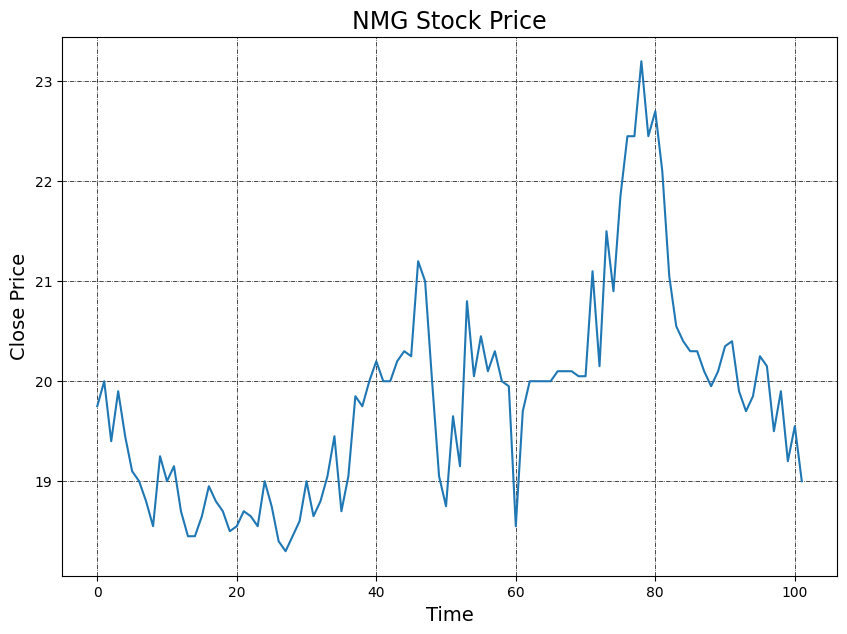

In [750]:
import matplotlib.pyplot as plt 

day_price_df['Day Price'].plot(figsize=(10, 7))
plt.title(random_company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [751]:
import pandas_ta as ta

day_price_df = day_price_df.copy()  #we need to create a copy  of a dataframe before modifying it .
day_price_df.loc[:, 'EMA'] = ta.ema(day_price_df['Day Price'], length=4)
day_price_df.loc[:, 'EMA_12M_LOW'] = ta.ema(day_price_df['12m Low'], length=4)
day_price_df.loc[:, 'EMA_12M_HIGH'] = ta.ema(day_price_df['12m High'], length=4)

day_price_df



,Day Price,12m Low,12m High,EMA,EMA_12M_LOW,EMA_12M_HIGH
0,19.75,14.20,26.5,NaN,NaN,NaN
1,20.00,14.20,26.5,NaN,NaN,NaN
2,19.40,14.20,26.5,NaN,NaN,NaN
3,19.90,14.20,26.5,19.762500,14.200000,26.5
4,19.45,14.20,26.5,19.637500,14.200000,26.5
...,...,...,...,...,...,...
97,19.50,16.70,26.5,19.854420,16.567777,26.5
98,19.90,16.75,26.5,19.872652,16.640666,26.5
99,19.20,16.75,26.5,19.603591,16.684400,26.5
100,19.55,17.00,26.5,19.582155,16.810640,26.5


# Generating the previous 12m High , Low and Day Price: using pd.shift()

In [752]:
day_price_df['previous_day_price_ema'] = day_price_df['EMA'].shift(1)
day_price_df['previous_12m_high_ema'] = day_price_df['EMA_12M_HIGH'].shift(1)
day_price_df['previous_12m_low_ema'] = day_price_df['EMA_12M_LOW'].shift(1)
day_price_df

,Day Price,12m Low,12m High,EMA,EMA_12M_LOW,EMA_12M_HIGH,previous_day_price_ema,previous_12m_high_ema,previous_12m_low_ema
0,19.75,14.20,26.5,NaN,NaN,NaN,NaN,NaN,NaN
1,20.00,14.20,26.5,NaN,NaN,NaN,NaN,NaN,NaN
2,19.40,14.20,26.5,NaN,NaN,NaN,NaN,NaN,NaN
3,19.90,14.20,26.5,19.762500,14.200000,26.5,NaN,NaN,NaN
4,19.45,14.20,26.5,19.637500,14.200000,26.5,19.762500,26.5,14.200000
...,...,...,...,...,...,...,...,...,...
97,19.50,16.70,26.5,19.854420,16.567777,26.5,20.090700,26.5,16.479629
98,19.90,16.75,26.5,19.872652,16.640666,26.5,19.854420,26.5,16.567777
99,19.20,16.75,26.5,19.603591,16.684400,26.5,19.872652,26.5,16.640666
100,19.55,17.00,26.5,19.582155,16.810640,26.5,19.603591,26.5,16.684400


In [753]:
day_price_df

,Day Price,12m Low,12m High,EMA,EMA_12M_LOW,EMA_12M_HIGH,previous_day_price_ema,previous_12m_high_ema,previous_12m_low_ema
0,19.75,14.20,26.5,NaN,NaN,NaN,NaN,NaN,NaN
1,20.00,14.20,26.5,NaN,NaN,NaN,NaN,NaN,NaN
2,19.40,14.20,26.5,NaN,NaN,NaN,NaN,NaN,NaN
3,19.90,14.20,26.5,19.762500,14.200000,26.5,NaN,NaN,NaN
4,19.45,14.20,26.5,19.637500,14.200000,26.5,19.762500,26.5,14.200000
...,...,...,...,...,...,...,...,...,...
97,19.50,16.70,26.5,19.854420,16.567777,26.5,20.090700,26.5,16.479629
98,19.90,16.75,26.5,19.872652,16.640666,26.5,19.854420,26.5,16.567777
99,19.20,16.75,26.5,19.603591,16.684400,26.5,19.872652,26.5,16.640666
100,19.55,17.00,26.5,19.582155,16.810640,26.5,19.603591,26.5,16.684400


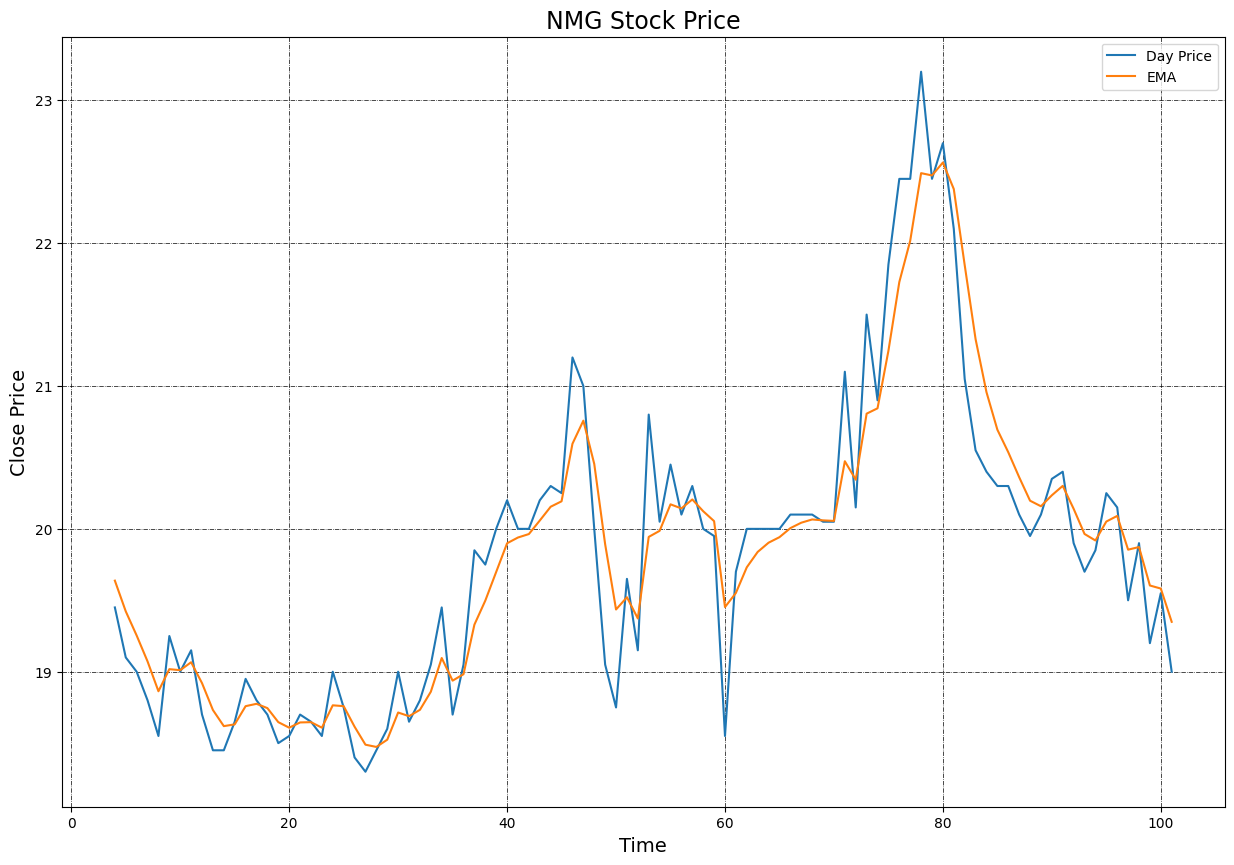

In [754]:
day_price_df.dropna(inplace=True)

day_price_df[['Day Price', 'EMA']].plot(figsize=(15, 10))
plt.title(random_company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [755]:
from sklearn.model_selection import train_test_split

features = day_price_df[['previous_day_price_ema','previous_12m_high_ema','previous_12m_low_ema']] #'previous_12m_high_ema','previous_12m_low_ema'
target = day_price_df[['Day Price']]

features

,previous_day_price_ema,previous_12m_high_ema,previous_12m_low_ema
4,19.762500,26.5,14.200000
5,19.637500,26.5,14.200000
6,19.422500,26.5,14.200000
7,19.253500,26.5,14.200000
8,19.072100,26.5,14.200000
...,...,...,...
97,20.090700,26.5,16.479629
98,19.854420,26.5,16.567777
99,19.872652,26.5,16.640666
100,19.603591,26.5,16.684400


# Feature selection : SelectKBest

In [756]:
from sklearn.feature_selection import SelectKBest, f_regression   # choosing the f_regression as the scoring function .

k_best = SelectKBest(score_func=f_regression, k=2)  # Select the top 2 features

X_new = k_best.fit_transform(features, target.values.flatten())

selected_feature_indices = k_best.get_support(indices=True)

selected_feature_names = features.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['previous_day_price_ema', 'previous_12m_low_ema'], dtype='object')


In [757]:
features = features.drop('previous_12m_high_ema', axis=1)
features


,previous_day_price_ema,previous_12m_low_ema
4,19.762500,14.200000
5,19.637500,14.200000
6,19.422500,14.200000
7,19.253500,14.200000
8,19.072100,14.200000
...,...,...
97,20.090700,16.479629
98,19.854420,16.567777
99,19.872652,16.640666
100,19.603591,16.684400


# Splitting Time Series Data : no shuffling

In [758]:
from sklearn.model_selection import TimeSeriesSplit

X=features.values
y=target['Day Price'].values

tscv = TimeSeriesSplit(n_splits=10)

generalized_test_indices = []
for i, (train_indices, test_indices) in enumerate(tscv.split(X)):
    
    random_test_index = np.random.choice(test_indices)
    generalized_test_indices.append(random_test_index)


generalized_train_indices = np.setdiff1d(np.arange(len(X)), generalized_test_indices)

X_train, X_test = X[generalized_train_indices], X[generalized_test_indices]
y_train, y_test = y[generalized_train_indices], y[generalized_test_indices] 
    
X_train.shape, y_test.shape

((88, 2), (10,))

# *********************** Grdient Boosting regressor model *************

In [759]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost

In [760]:

model = xgboost.XGBRegressor(objective='reg:squarederror')  # Specifies regression objective

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Gradient Boosting Regressor Cross-Validation Scores:", end=' ')
print(cross_val_scores)

average_score = np.mean(cross_val_scores)
print(f"\nAverage Performance Metric: {average_score:.2f}")

Gradient Boosting Regressor Cross-Validation Scores: [-0.54169911 -0.38315051 -0.54608309 -2.72731329 -0.43230242]

Average Performance Metric: -0.93


In [761]:
# base_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=42)
# 
# hyper_parameter_grid ={
#     'n_estimators': [100, 200, 300,500,1000],
#     'learning_rate': [0.01,0.15, 0.1, 0.2],
#     'booster':['gbtree','gblinear'],
#     'max_depth': [3, 5,7,15],
#     'min_child_weight': [1, 3,5,7,9,10],
# 
# }
# grid_search =RandomizedSearchCV(
#     estimator=base_model, 
#     param_distributions= hyper_parameter_grid,
#     cv=5,
#     n_iter=100, 
#     scoring='neg_mean_squared_error', 
#     n_jobs=-1
# )
# grid_search =GridSearchCV(estimator=base_model, param_grid= hyper_parameter_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_params


In [762]:
grid_search_best_params = {
    'booster': 'gbtree',
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 10,
    'n_estimators': 300
}

In [763]:
final_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=42, **grid_search_best_params)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [764]:
import pandas as pd
predicted_stock_prices = final_model.predict(X_test)

results=pd.DataFrame({
    "Actual Stock Prices": y_test,
    "Predicted Stock Prices":predicted_stock_prices
})
results


,Actual Stock Prices,Predicted Stock Prices
0,18.45,18.752663
1,19.05,18.752663
2,20.00,19.964151
3,19.15,19.701656
4,20.10,20.224089
5,20.05,20.130322
6,20.90,20.657413
7,21.05,21.565821
8,19.90,20.639793
9,20.25,19.956562


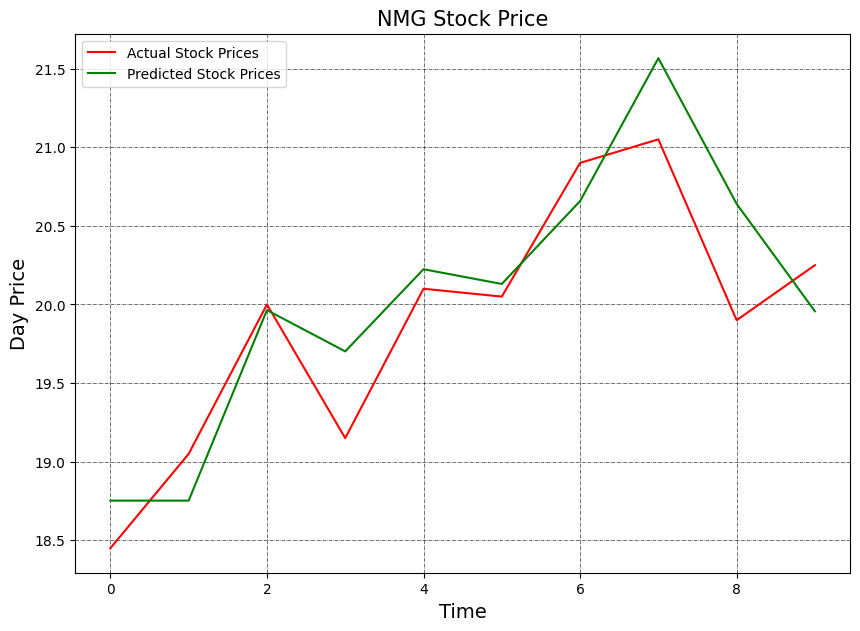

In [765]:
results[['Actual Stock Prices', 'Predicted Stock Prices']].plot(figsize=(10, 7), color=['red', 'green'])
plt.title(random_company_code + " Stock Price", fontsize=15)
plt.ylabel('Day Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=.4)
plt.show()